[Simple interface](#Interactive-visualization) to visualize all tasks using ipywidgets.   
 
The motivation for this kernel : Since this competition is a bit different and so are all the tasks, it is nice to visualize all of them. However, lots of these visualizations make the kernel too long and hard to navigate. This interface can be used to quickly refer to any task in a click.     

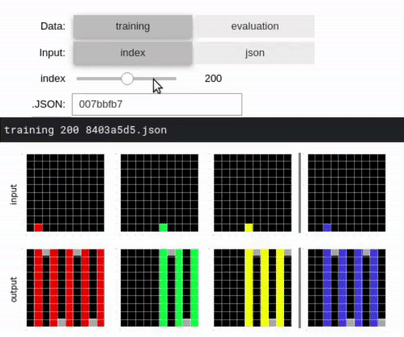

Feel free to use it in your kernels directly and save space for better things you want to share. If you find it useful/interesting, consider to upvote.   

P.S The widgets as in the GIF above are visible, only when the kernel is running.

#### Import libraries

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, GridspecLayout

from matplotlib import pyplot as plt
from matplotlib import colors

import numpy as np

import os
import json

!jupyter nbextension enable --py widgetsnbextension

## Sort Files

In [ ]:
root_dir = '/kaggle/input/abstraction-and-reasoning-challenge'
training_files = sorted(os.listdir(f"{root_dir}/training/"))
evaluation_files = sorted(os.listdir(f"{root_dir}/evaluation/"))
test_files = sorted(os.listdir(f"{root_dir}/test/"))

## Plotting Method

In [ ]:
arc_colors =  ['#000000', "#0074D9", "#FF4136", "#2ECC40", '#FFDC00', "#AAAAAA", '#F012BE', '#FF851B', '#7FDBFF', "#870C25"]
cmap = colors.ListedColormap(arc_colors)
norm = colors.Normalize(vmin=0, vmax=9)

# method called by the interact cell
def plot_data(path):
    with open(path) as file:
        data = json.load(file)
        
    n_train = len(data['train'])
    fig, axs = plt.subplots(2, n_train+1, figsize=(8,4))
    
    for x in axs:
        for y in x:    
            y.grid(b=True)
            y.tick_params(direction='out', length=0, width=0, colors='r',
                          labelsize=0, grid_color='w', grid_alpha=0.5)

    for i in range(0, n_train): 
        # Train Input
        axs[0,i].imshow(data['train'][i]['input'], cmap=cmap, norm=norm)
        # To fix misalignment of grid and image caused by the pixel snapping issue in matplotlib
        axs[0,i].set_xticks(np.array(range(len(data['train'][i]['input'][0])))-0.5)
        axs[0,i].set_yticks(np.array(range(len(data['train'][i]['input'])))-0.5)
        # Train Output
        axs[1,i].imshow(data['train'][i]['output'], cmap=cmap, norm=norm)
        axs[1,i].set_xticks(np.array(range(len(data['train'][i]['output'][0])))-0.5)
        axs[1,i].set_yticks(np.array(range(len(data['train'][i]['output'])))-0.5)
    # Test Input
    axs[0,n_train].imshow(data['test'][0]['input'], cmap=cmap, norm=norm)
    axs[0,n_train].set_xticks(np.array(range(len(data['test'][0]['input'][0])))-0.5)
    axs[0,n_train].set_yticks(np.array(range(len(data['test'][0]['input'])))-0.5)
    # Test output
    axs[1,n_train].imshow(data['test'][0]['output'], cmap=cmap, norm=norm)
    axs[1,n_train].set_xticks(np.array(range(len(data['test'][0]['output'][0])))-0.5)
    axs[1,n_train].set_yticks(np.array(range(len(data['test'][0]['output'])))-0.5)

    # separator
    axs[0,n_train].plot([-0.1, -0.1], [0,1], color='grey', lw=3, transform=axs[0,n_train].transAxes, clip_on=False)
    axs[1,n_train].plot([-0.1, -0.1], [0,1], color='grey', lw=3, transform=axs[1,n_train].transAxes, clip_on=False)

    axs[0,0].set_ylabel('input')
    axs[1,0].set_ylabel('output')
    
    plt.show()

## Interactive visualization

In [ ]:
data_type = widgets.ToggleButtons(
    options=['training', 'evaluation'],
    description='Data:',
)

input_type = widgets.ToggleButtons(
    options=['index', 'json'],
    description='Input:',
)

text_json = widgets.Text(
    value='007bbfb7',
    description='.JSON:',
)

@interact
def show_me_the_data(list_type = data_type, 
                     inp = input_type,
                     index=(1, 400, 1),
                     json_id = text_json):
    
    json_id = json_id+".json"
    
    if list_type == 'training':
        if inp == 'index':
            data = training_files[index-1]
        elif json_id in training_files:
            data = json_id
        else:
            print(u"\u274C", " check file id")
            return

    elif list_type == "evaluation":
        if inp  == 'index':
            data = evaluation_files[index-1]
        elif json_id in evaluation_files:
            data = json_id
        else:
            print(u"\u274C", " check file id")
            return

    print(list_type, index, data)
    plot_data(f'{root_dir}/{list_type}/{data}')

Discovered a task which is hard even for us humans? Please share. Have fun exploring! 